In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import vpi
import time

fs = cv2.FileStorage("rectify_map_imx219_160deg_1080p.yaml", cv2.FILE_STORAGE_READ)

map_l = (
    fs.getNode('map_l_x').mat(),
    fs.getNode('map_l_y').mat()
)

map_r = (
    fs.getNode('map_r_x').mat(),
    fs.getNode('map_r_y').mat()
)

fs.release()

In [37]:
!ls 

1080p_stereo_calib/left/001.png


In [2]:
src_map_l = map_l[0]
idk_what_that_is_l = map_l[1]

map_l_y, map_l_x = map_l[0][:,:,0], map_l[0][:,:,1]
map_r_y, map_r_x = map_r[0][:,:,0], map_r[0][:,:,1]
map_r_x.shape

(1080, 1920)

In [3]:
# Reference map (identity mapping)
map_ref_x, map_ref_y = np.mgrid[0:1080:1, 0:1920:1]

## VPI remap

In [36]:
!ls 1080p_stereo_calib/left/001.png

1080p_stereo_calib/left/001.png


In [63]:
arr_in = np.asarray(Image.open('1080p_stereo_calib/left/001.png'))
vpi_img = vpi.asimage(arr_in)

In [156]:
warp = vpi.WarpMap(vpi.WarpGrid((1920,1080)))

# (H, W, C) -> (C,H,W)
arr_warp =  np.asarray(warp)
wx = arr_warp[:,:,0]
wy = arr_warp[:,:,1]

wy[:1080,:] = map_l_x
wx[:1080,:] = map_l_y

In [157]:
t1 = time.perf_counter()

with vpi.Backend.CUDA:
    for _ in range(200):
        vpi_img_out = vpi_img.remap(warp)
        arr_out = vpi_img_out.cpu()
        
t2 = time.perf_counter()

print(f"{200/(t2 - t1)} FPS")

254.00040348019982 FPS


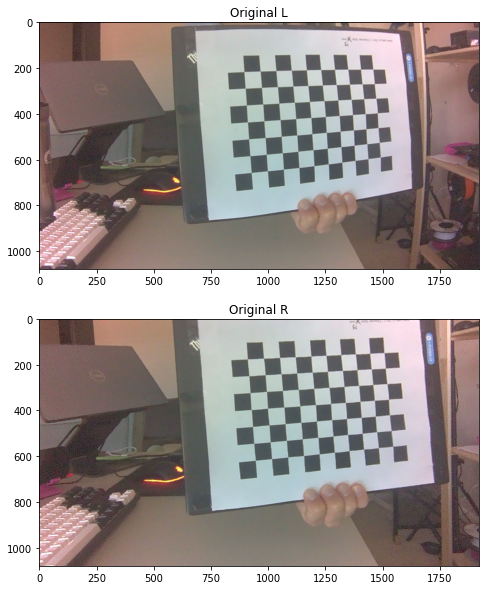

In [158]:
fig, axs = plt.subplots(2, 1, figsize=(20,10))

# before
axs[0].title.set_text('Original L')
axs[0].imshow(arr_in)

axs[1].title.set_text('Original R')
axs[1].imshow(arr_out)